<a href="https://colab.research.google.com/github/Sireesha024/CS59000_06_Ethical_Artificial_Intelligence/blob/lair_dataset/Liar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd

# Load dataset (assuming it's in the working directory)
df = pd.read_csv("/content/train.tsv", sep="\t", header=None)

# Display first few rows
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [12]:
df.columns = ["id", "label", "statement", "subject", "speaker", "job_title",
              "state", "party_affiliation", "barely_true_counts", "false_counts",
              "half_true_counts", "mostly_true_counts", "pants_on_fire_counts", "context"]


In [13]:
print(df.isnull().sum())  # Count of missing values per column
df.dropna(inplace=True)   # Drop rows with missing values (optional)


id                         0
label                      0
statement                  0
subject                    2
speaker                    2
job_title               2898
state                   2210
party_affiliation          2
barely_true_counts         2
false_counts               2
half_true_counts           2
mostly_true_counts         2
pants_on_fire_counts       2
context                  102
dtype: int64


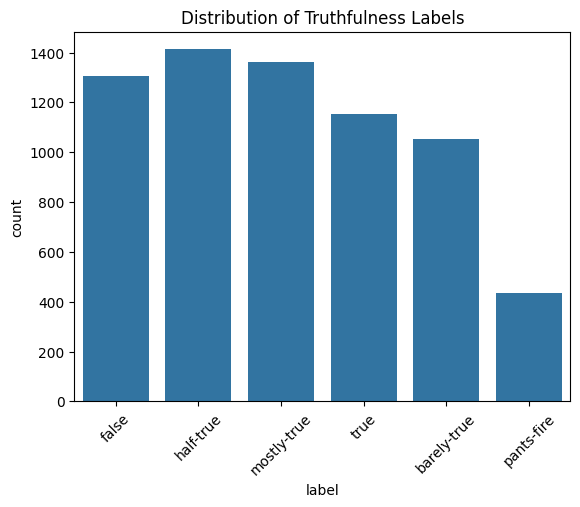

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df["label"])
plt.title("Distribution of Truthfulness Labels")
plt.xticks(rotation=45)
plt.show()


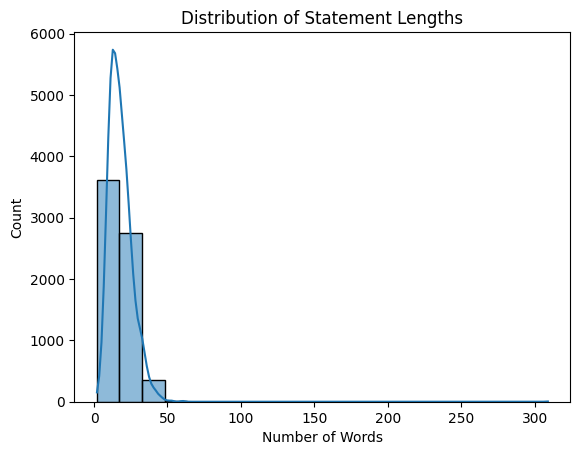

In [16]:
df["statement_length"] = df["statement"].apply(lambda x: len(str(x).split()))

sns.histplot(df["statement_length"], bins=20, kde=True)
plt.title("Distribution of Statement Lengths")
plt.xlabel("Number of Words")
plt.show()

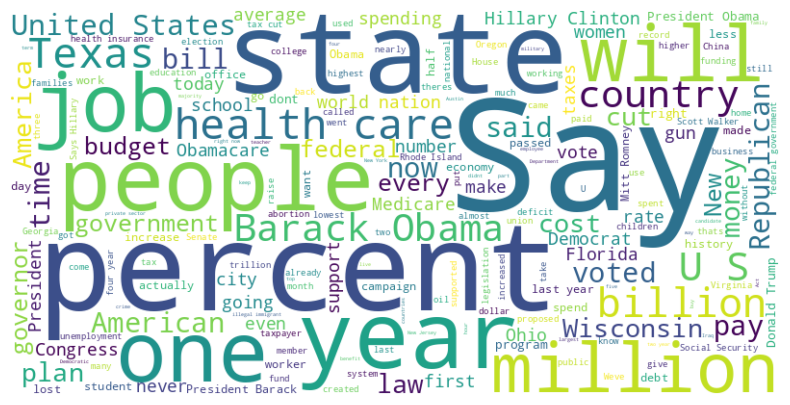

In [17]:
from wordcloud import WordCloud

text = " ".join(df["statement"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


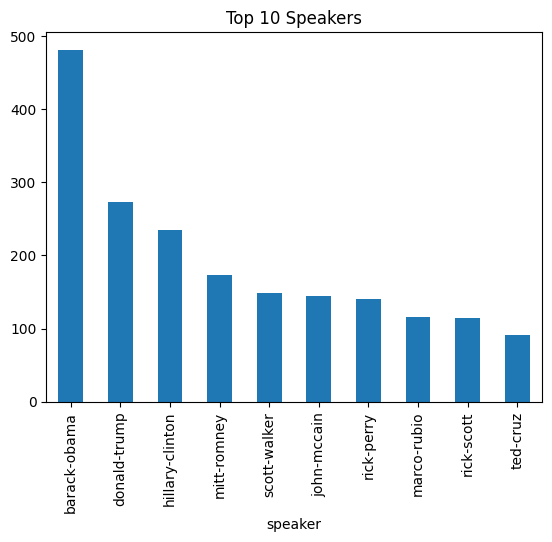

In [18]:
df["speaker"].value_counts().head(10).plot(kind="bar", title="Top 10 Speakers")
plt.show()


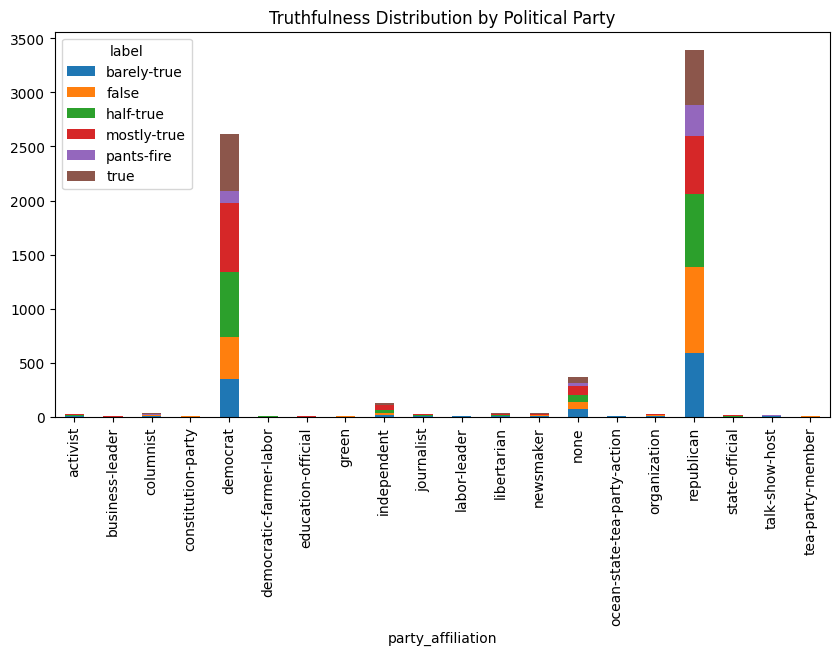

In [19]:
party_label_counts = df.groupby("party_affiliation")["label"].value_counts().unstack()
party_label_counts.plot(kind="bar", stacked=True, figsize=(10, 5))
plt.title("Truthfulness Distribution by Political Party")
plt.show()


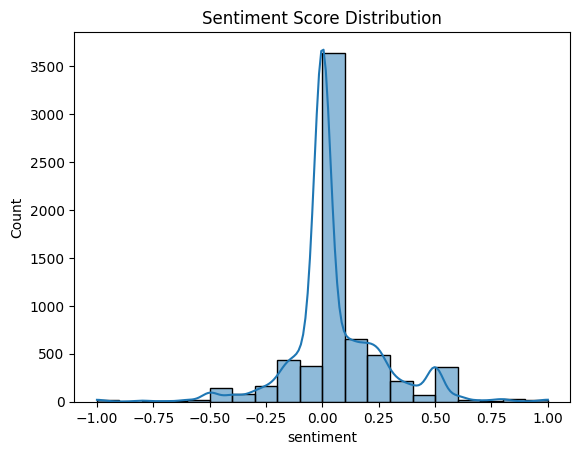

In [20]:
from textblob import TextBlob

df["sentiment"] = df["statement"].apply(lambda x: TextBlob(x).sentiment.polarity)

sns.histplot(df["sentiment"], bins=20, kde=True)
plt.title("Sentiment Score Distribution")
plt.show()


In [22]:
from collections import Counter
from nltk.util import ngrams
import nltk

nltk.download("punkt")
nltk.download('punkt_tab')


def get_ngrams(text, n=2):
    words = nltk.word_tokenize(text.lower())
    return list(ngrams(words, n))

bigram_counts = Counter([bigram for statement in df["statement"] for bigram in get_ngrams(statement, 2)])
print(bigram_counts.most_common(10))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


[(('in', 'the'), 958), (('of', 'the'), 701), (('percent', 'of'), 406), (('health', 'care'), 270), (('more', 'than'), 256), ((',', 'the'), 248), (('to', 'the'), 235), (('.', "''"), 229), (('the', 'united'), 226), (('united', 'states'), 226)]
